# Radyal Temelli Fonksiyon Ağları (Radial Basis Function Networks) (RBFNs)

In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer # Etiketleri one-hot encoding formatına dönüştürür
from sklearn.preprocessing import StandardScaler # Veriyi standardize eder .(0 Ortalamalı , 1 Standart sapmalı)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer , Dense , Flatten
from tensorflow.keras import backend as K # Keras backend API (Tensor işlemlerini yapar.)
import warnings
warnings.filterwarnings("ignore")

### 1) Veri Setinin Yüklenmesi 

In [2]:
iris = load_iris()

In [3]:
x = iris.data
y = iris.target

Standartizasyon İşlemi

In [4]:
label_binarizer = LabelBinarizer()
y_encoded = label_binarizer.fit_transform(y)

Standardizasyon İşlemi

In [5]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [6]:
x_train , x_test , y_train , y_test = train_test_split(x,y_encoded,test_size = 0.2 , random_state = 42)

### 2)Radyal Temelli Fonksiyon Katmanı

In [7]:
class RBFLayer(Layer):
    #RBFLayer Keras'ın Layer sınıfından miras(inheritance) alır .
    def __init__(self , units , gamma , **kwargs):
        """
            constructor
            katmanın genel özelliklerini başlatmak için gereklidir
        """
        # Layer sınıfının init metodunu çağırır , katmanın genel özellikerini başlatmak için gereklidir.
        super(RBFLayer,self).__init__(**kwargs) 
        self.units = units
        #RBF fonk. yayılım parametresi , RBF dutarlılığı diyebiliriz , gamma'yı float32 türüne çevirir.
        self.gamma = K.cast_to_floatx(gamma)
        

    def build(self,input_shape):
        """
            build metodu katman ağırlıkları tanımlanır
            bu metot , keras tarafından katman ilk defa bir input aldığında otomatik olarak çağrılır
        """
        # add_weight = Keras'ta eğitilecek ağırlıkları tanımlamak için kullanılır.
        #shape : ağırlıkların boyutu tanımlanır | input_shape : giriş verisinin boyutu | self.units : merkezlerin sayısı
        self.mu = self.add_weight( name="mu",shape = (int(input_shape[1]),self.units) , initializer = "uniform" , trainable = True )
        
        # Layer sınıfı build metodu çağrılarak katmanın inşası tamamlanır .
        super(RBFLayer,self).build(input_shape)

    def call(self,inputs):
        """ 
            Katman Çağırıldığında (forward propagation sırasında çağrılır) çalışır
            bu fonksiyon girdiyi alır , çıktıyı hesaplar
        """
        #İnputlar ve merkezler arasındaki fark hesaplanır .
        diff = K.expand_dims(inputs) - self.mu #K.expand_dims(inputs) girdiye boyut ekler 
        
        l2 = K.sum(K.pow(diff,2) , axis = 1)
        
        #l2 mesafesinin gamma ile çarpılması ve negatif üstel bir fonk. alınması rbf değerini üretir
        res = K.exp(-1 * self.gamma * l2)
        
        return res 

    def compute_outpu_shape(self,input_shape):
        """ 
            Bu metot katmanın çıktısının şekli hakkında bilgi veriri .
            Keras yardımcı fonk. bir tanesidir .
        """
        #Çıktının şekli (num_samples , num_units) | input_shape : sample sayısı
        return (input_shape[0] , self.units ) 

### 3)Modelin Oluşturulması

In [8]:
def build_model():
    model = Sequential()
    
    #Giriş Verisini Düzleştir
    model.add(Flatten(input_shape = (4,))) 
    
    #RBF katmanı 10 Nöron ve 0.5 gamma
    model.add(RBFLayer(10,0.5))
    
    #Output katmanı 3 (sınıf sayısı > 2) olduğu için softmax
    model.add(Dense(3 , activation = "softmax"))

    #Compile
    model.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
    
    return model

### 4)Modelin Eğitilmesi

In [9]:
model = build_model()

In [10]:
history = model.fit(x_train , y_train , epochs = 250 , batch_size = 4 , validation_split = 0.3 , verbose = 1)

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4507 - loss: 1.0984 - val_accuracy: 0.2222 - val_loss: 1.0999
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4469 - loss: 1.0970 - val_accuracy: 0.2222 - val_loss: 1.1005
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3660 - loss: 1.0980 - val_accuracy: 0.2222 - val_loss: 1.1009
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4052 - loss: 1.0976 - val_accuracy: 0.2222 - val_loss: 1.1017
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2523 - loss: 1.1007 - val_accuracy: 0.2222 - val_loss: 1.1018
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3838 - loss: 1.0972 - val_accuracy: 0.2222 - val_loss: 1.1028
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4411 - loss: 1.0945 - val_accuracy: 0.2222 - val_loss: 1.1036
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3642 - loss: 1.0970 - val_accuracy: 0.2222 - 

### 5)Modelin Değerlendirilmesi 

Test veri setindeki modelin kaybı ve doğruluğunun değerlendirilmesi

In [12]:
loss , accuracy = model.evaluate(x_test , y_test) 
print(f"Test Loss : {loss:.4f} Test Accuracy : {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.9333 - loss: 0.3776
Test Loss : 0.3776 Test Accuracy : 0.9333


Sonuçların Görselleştirilmesi

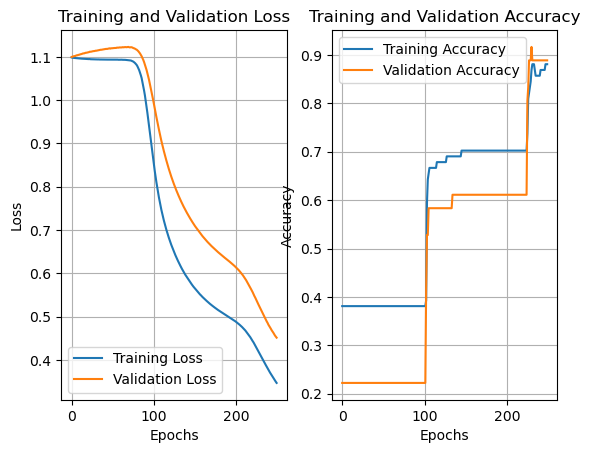

In [13]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(history.history["loss"] , label = "Training Loss")
plt.plot(history.history["val_loss"] , label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"] , label = "Training Accuracy")
plt.plot(history.history["val_accuracy"] , label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
